# Project Name:- Temperature Forecast 

# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("E:\Temperature Forecast\Temperature Forecast.csv")

In [13]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [15]:
df['Date']= pd.to_datetime(df['Date'])

# Extracting Date, Month and Year From date column

In [16]:
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year


In [17]:
df.drop(columns=['Date'],inplace=True)

In [18]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [20]:
print('Number of Rows:',df.shape[0])
print('Number Of Columns:',df.shape[1])

Number of Rows: 7752
Number Of Columns: 27


# Exploratory Data Analysis

In [21]:
df.duplicated().sum()

0

In [22]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

<Axes: >

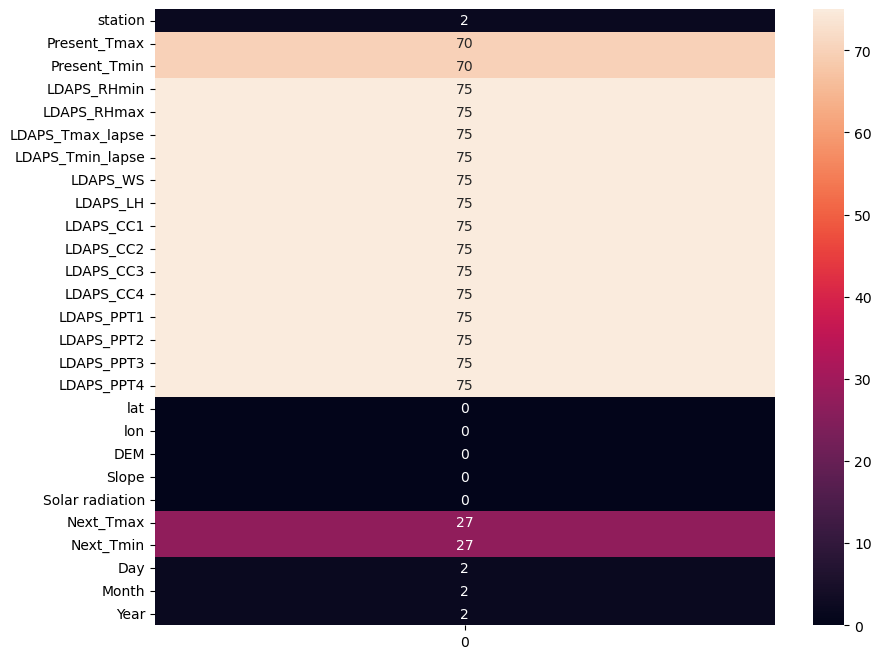

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull().sum().to_frame(),annot=True)

# Handeling the null values
Filling the Null values with zeros

In [24]:
df.fillna(0,inplace=True)

In [25]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

# Univariate Analysis

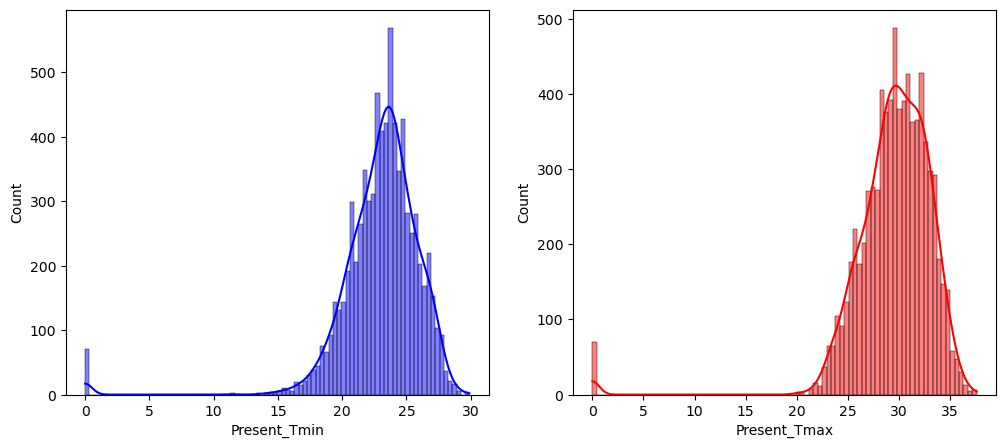

In [31]:
# plotting histogram for minimum and maximum temperature
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmin'],kde=True, color='b')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.show()

Comment:
    Max temperature is in range of 21-38
    min temperature is in range of 14-30

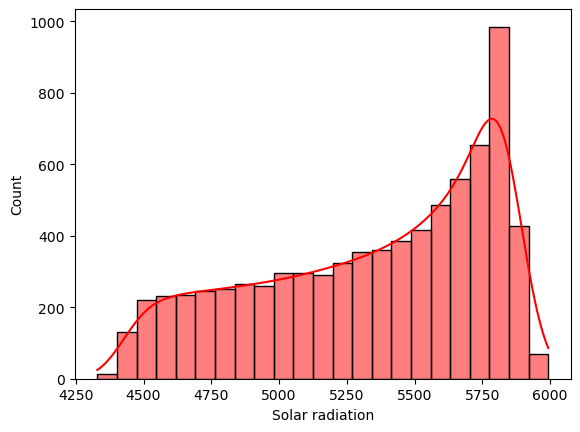

In [32]:
sns.histplot(df['Solar radiation'],kde=True, color= 'r')
plt.show()

Solar raadiation rnage is 4250-6000

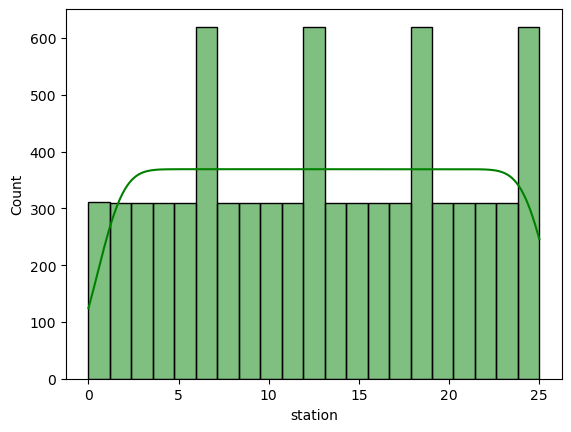

In [33]:
sns.histplot(df['station'], kde= True, color='g')
plt.show()

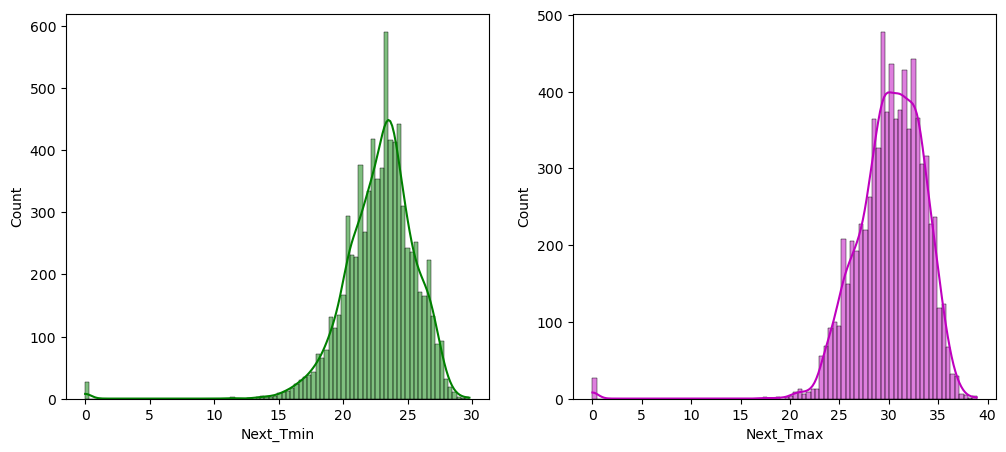

In [35]:
# plotting hisstogram for next max and next min variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmin'],kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmax'],kde= True, color='m')
plt.show()

Comment:-
    * Next Day Max Temperature is in range of 19-38.
    
    * Next Day Min Temperature is in range of 13-30

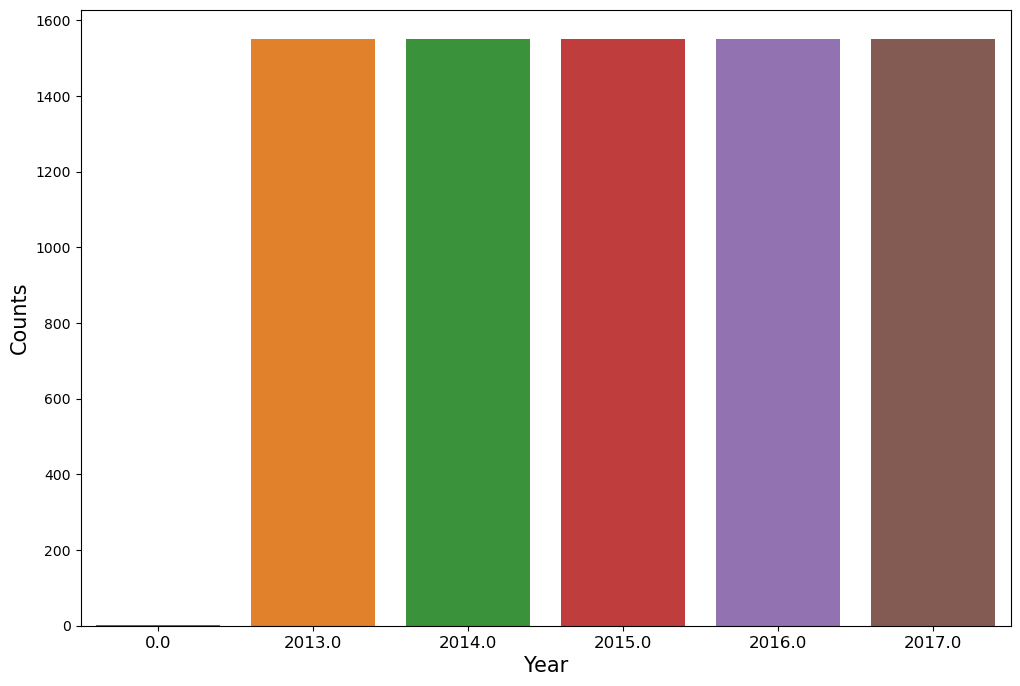

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Year')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

Ratio of average Temperature is Equal in every Year

# Bivariate analysis

* Temperature variation between Present Tmax And Tmin


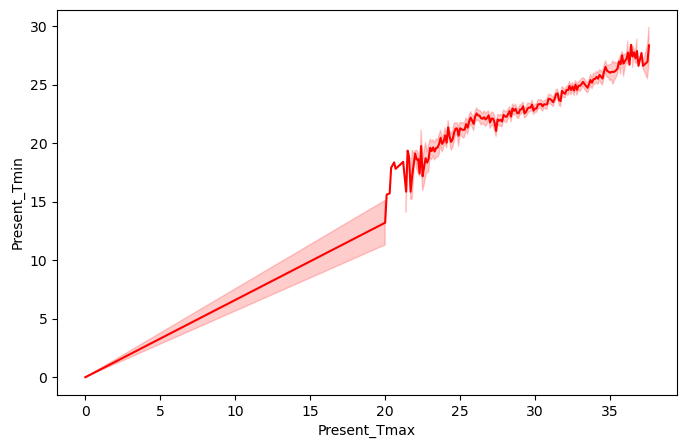

In [37]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Present_Tmax',y= 'Present_Tmin',color= 'r')
plt.show()

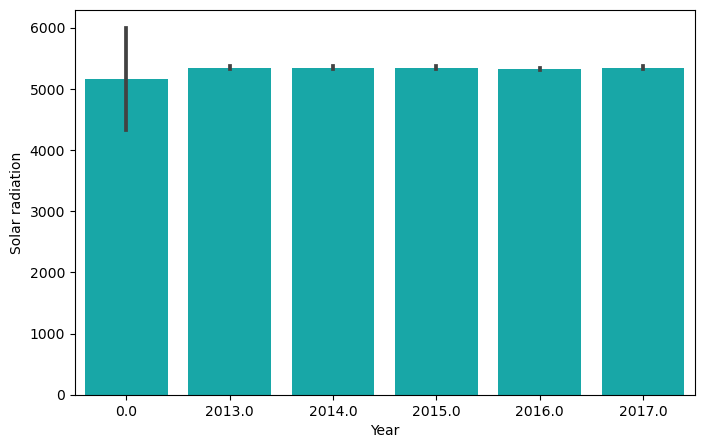

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,y='Solar radiation', x='Year', color='c')
plt.show()

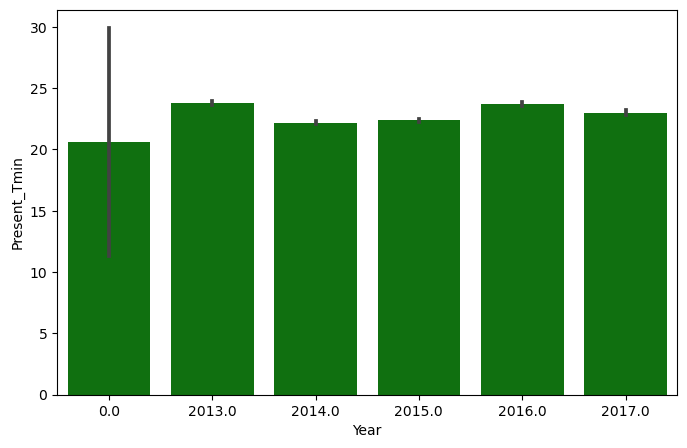

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Year', y='Present_Tmin',color='g')
plt.show()

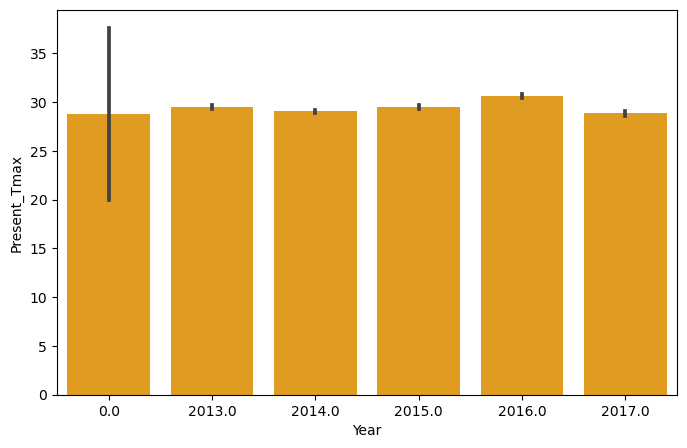

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Year', y='Present_Tmax',color='orange')
plt.show()

# Comment:-
    * Here max and min Temperature is not vary yearly

# Statistical Analysis

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7752.0,12.996646,7.213660,0.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7752.0,29.499407,4.083116,0.000000,27.700000,29.900000,32.000000,37.600000
Present_Tmin,7752.0,23.015338,3.256071,0.000000,21.600000,23.400000,24.900000,29.900000
LDAPS_RHmin,7752.0,56.210230,15.618676,0.000000,45.735368,54.828714,67.038254,98.524734
LDAPS_RHmax,7752.0,87.519784,11.227876,0.000000,84.038809,89.699505,93.704500,100.000153
LDAPS_Tmax_lapse,7752.0,29.326939,4.123757,0.000000,27.601014,29.662273,31.683819,38.542255
LDAPS_Tmin_lapse,7752.0,23.285106,3.277967,0.000000,22.032374,23.735942,25.134000,29.619342
LDAPS_WS,7752.0,7.029203,2.281613,0.000000,5.647741,6.531345,8.007471,21.857621
LDAPS_LH,7752.0,61.900288,34.120103,-13.603212,36.776474,56.487289,83.904586,213.414006
LDAPS_CC1,7752.0,0.365206,0.263668,0.000000,0.141643,0.312156,0.571696,0.967277


We can see that there is high possiblity of outlier existence

<Axes: >

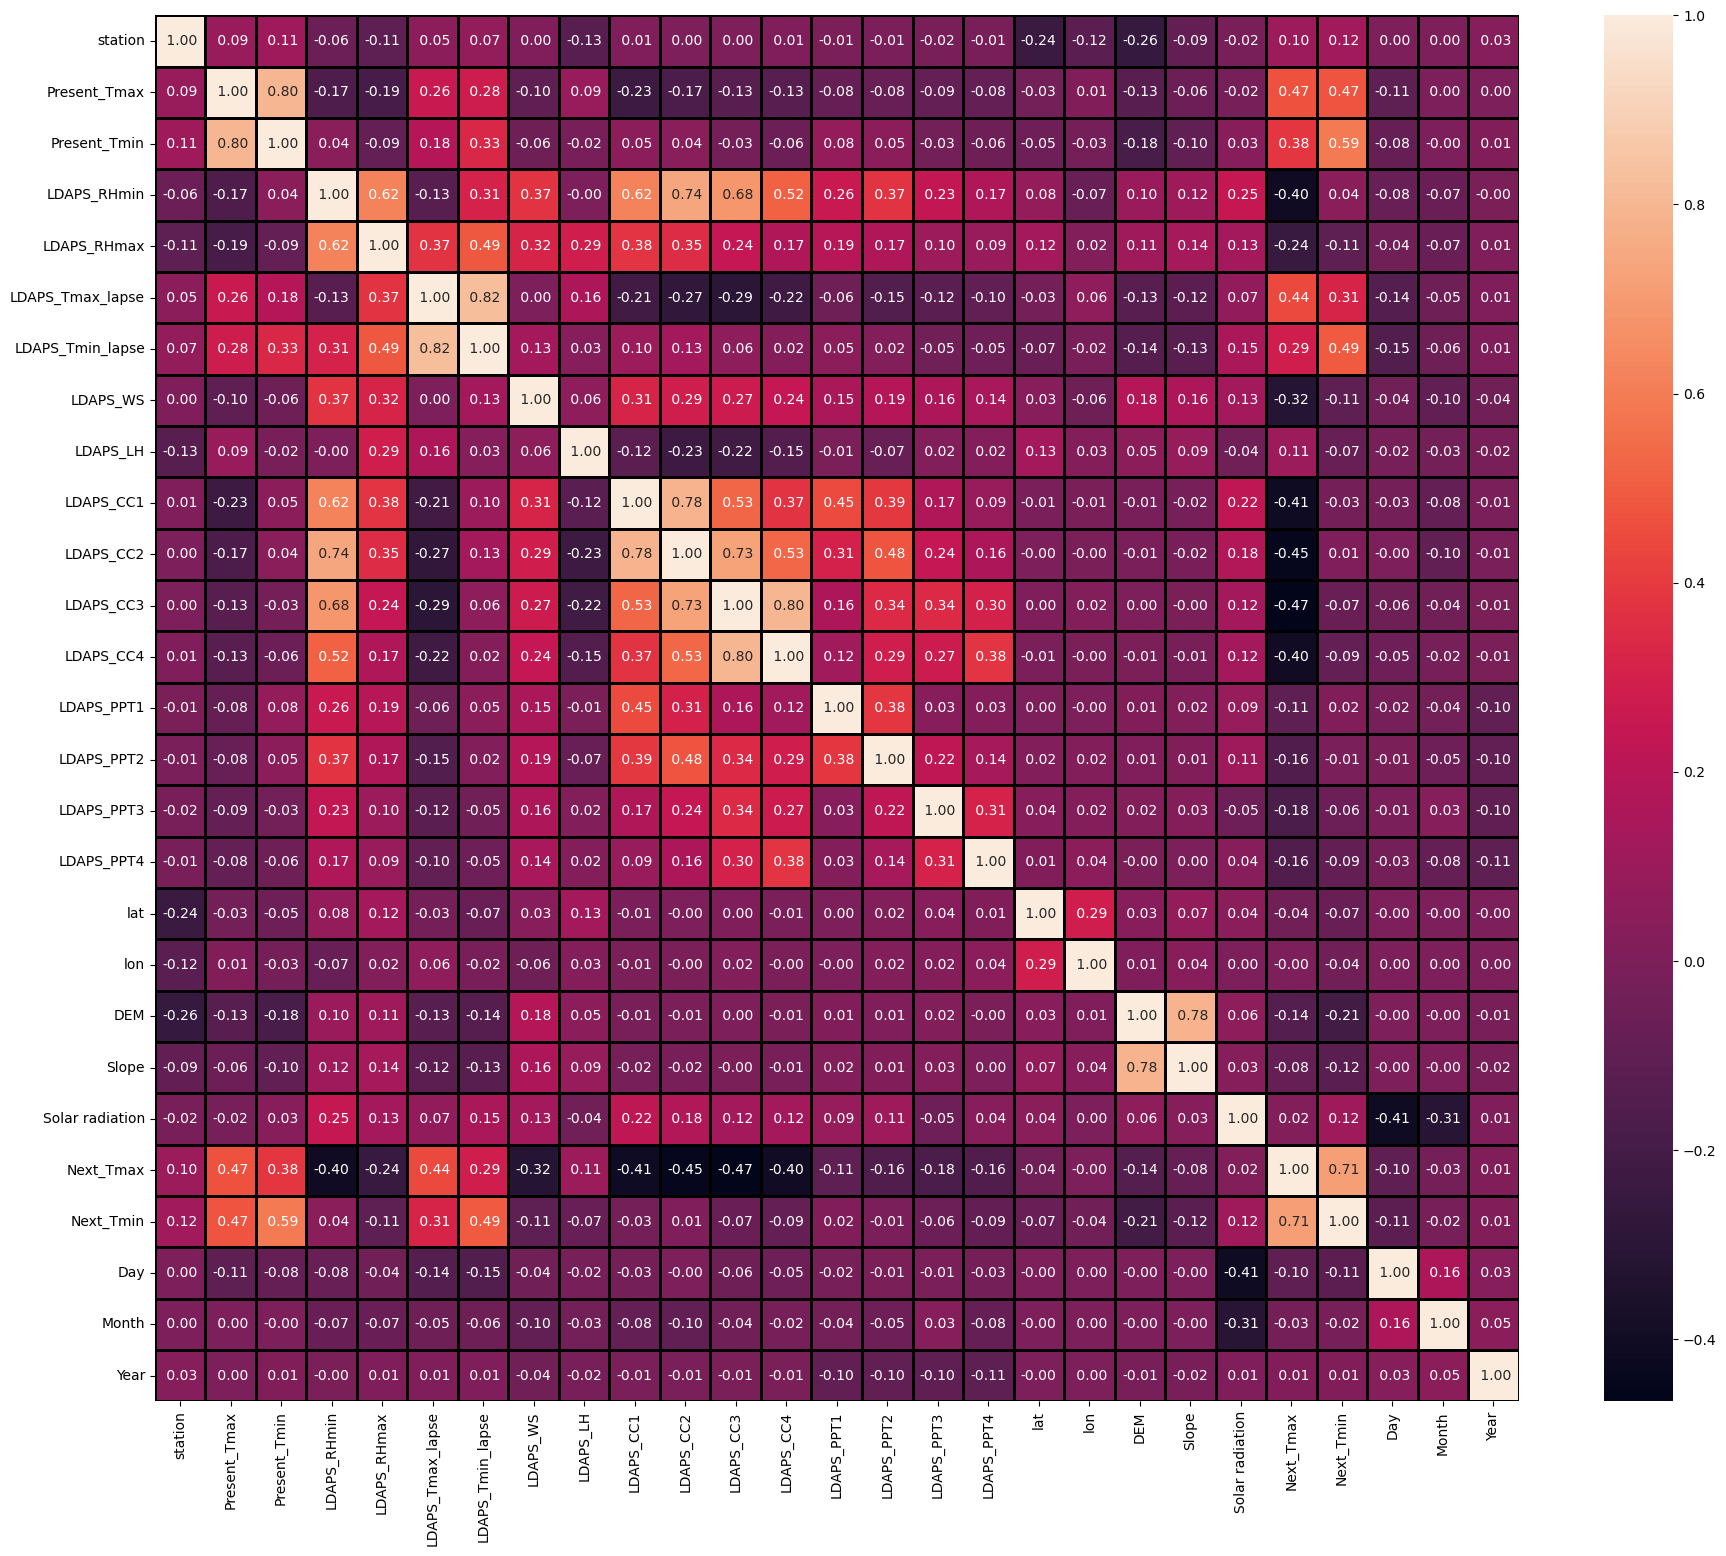

In [43]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

# Comment:-
    Present_Tmax & Prent_Tmin is highly correlated to Target Variable.
LDAPS_Tmax_lapes & LDAPS_Tmin_lapes is also highly correlated to Target Variables.
LDAPS_cc1,LDAPS_cc2,LDAPS_cc3 & LDAPS_cc4 are negativity correlated to target variables.

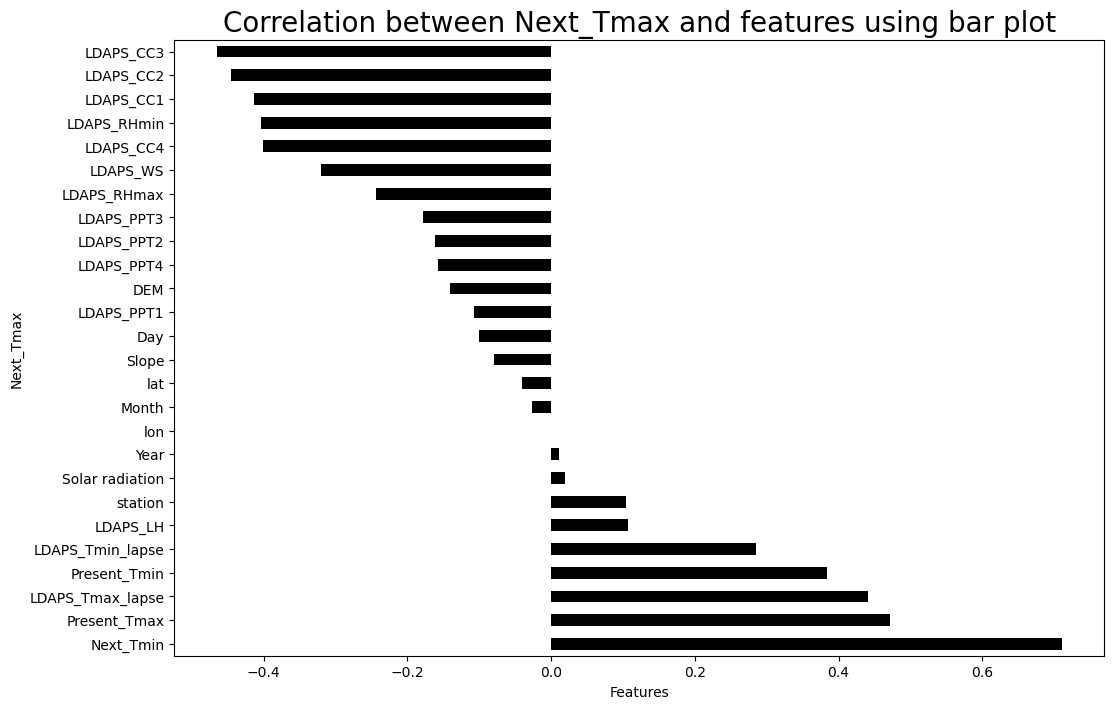

In [45]:
plt.figure(figsize=(12,8))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='barh',color='k')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Next_Tmax',fontsize=10)
plt.title('Correlation between Next_Tmax and features using bar plot',fontsize=20)
plt.show()

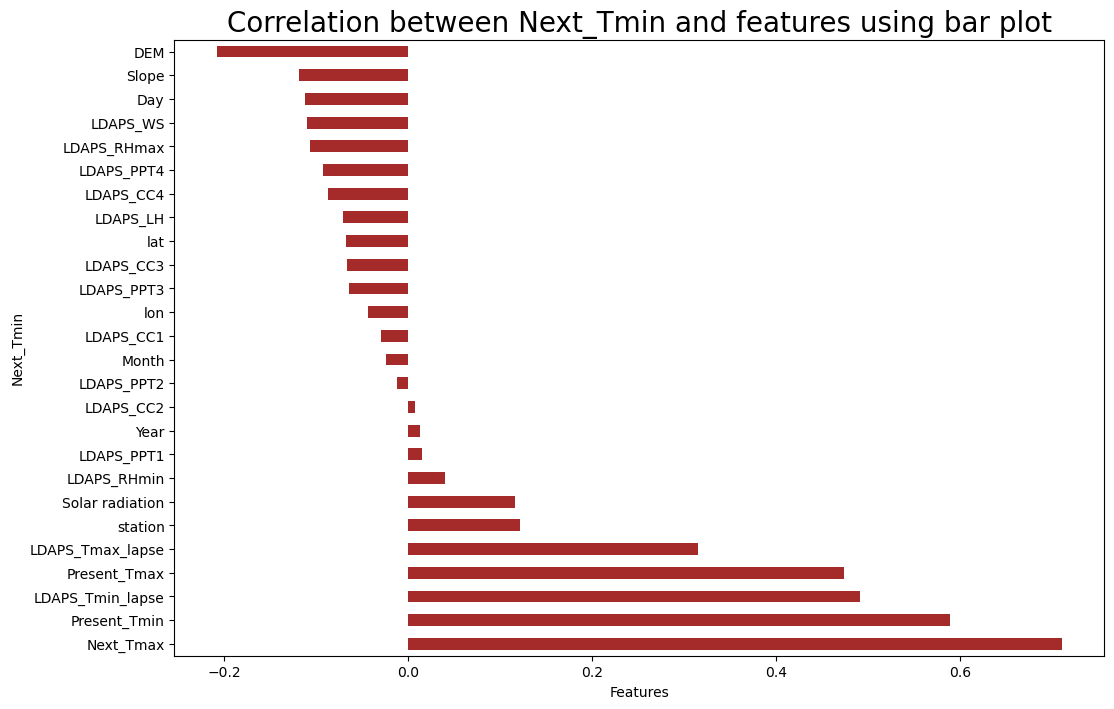

In [47]:
plt.figure(figsize=(12,8))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='barh',color='brown')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Next_Tmin',fontsize=10)
plt.title('Correlation between Next_Tmin and features using bar plot',fontsize=20)
plt.show()

# Outlier Detection

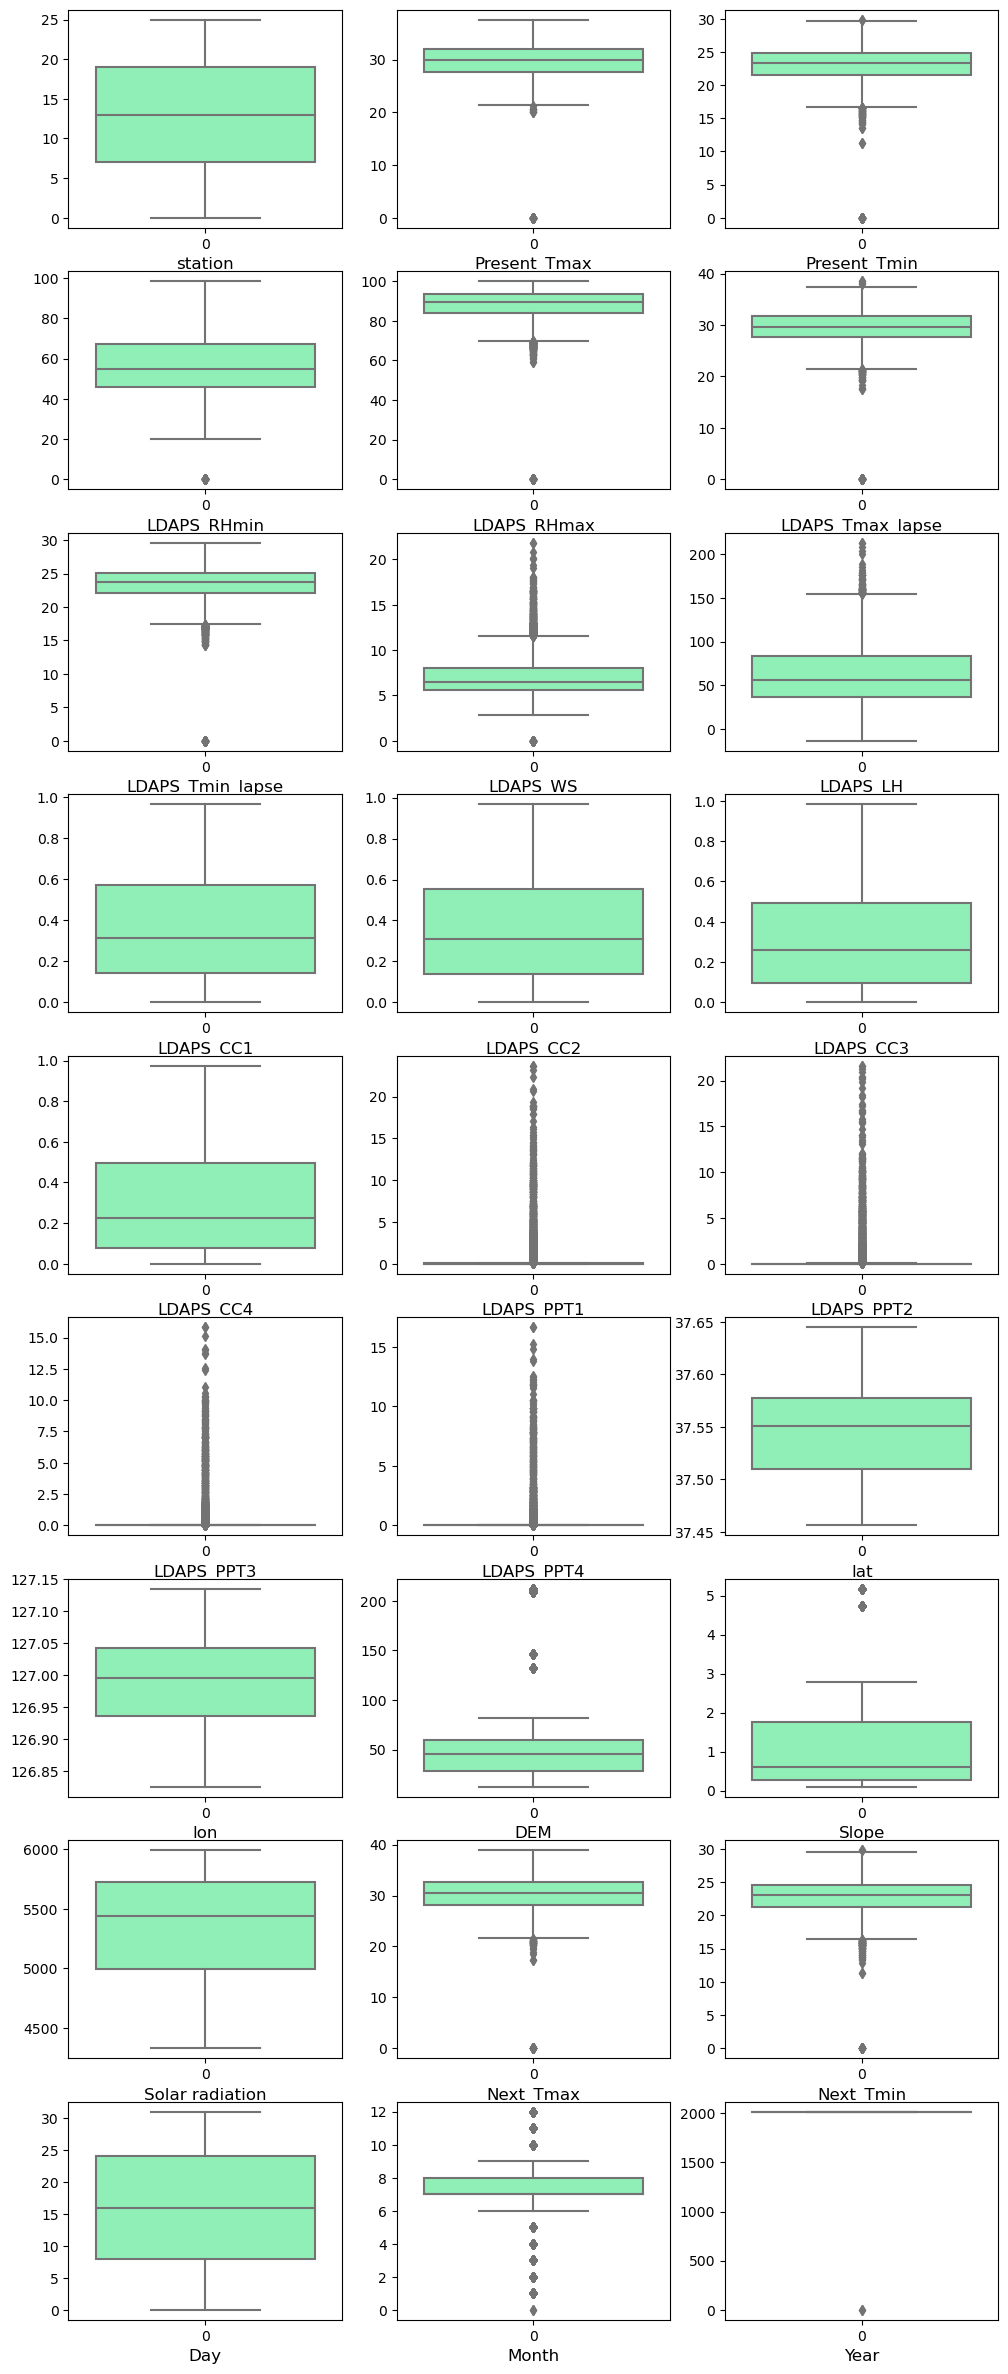

In [48]:
plt.figure(figsize=(12,30))
index=1
for column in df:
    if index <=27:
        ax=plt.subplot(9,3,index)
        sns.boxplot(df[column], palette='rainbow')
        plt.xlabel(column, fontsize=12)
    index+=1
plt.show()

# Removing Of Outlier

In [51]:
from scipy.stats import zscore

columns_to_remove=[ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
        'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope',
       'Solar radiation', 'Month']

z_score = df[columns_to_remove].apply(zscore)
threshold=3
df1 = df[(z_score.abs()<threshold).all(axis=1)]

# Checking Skewness Of dataset

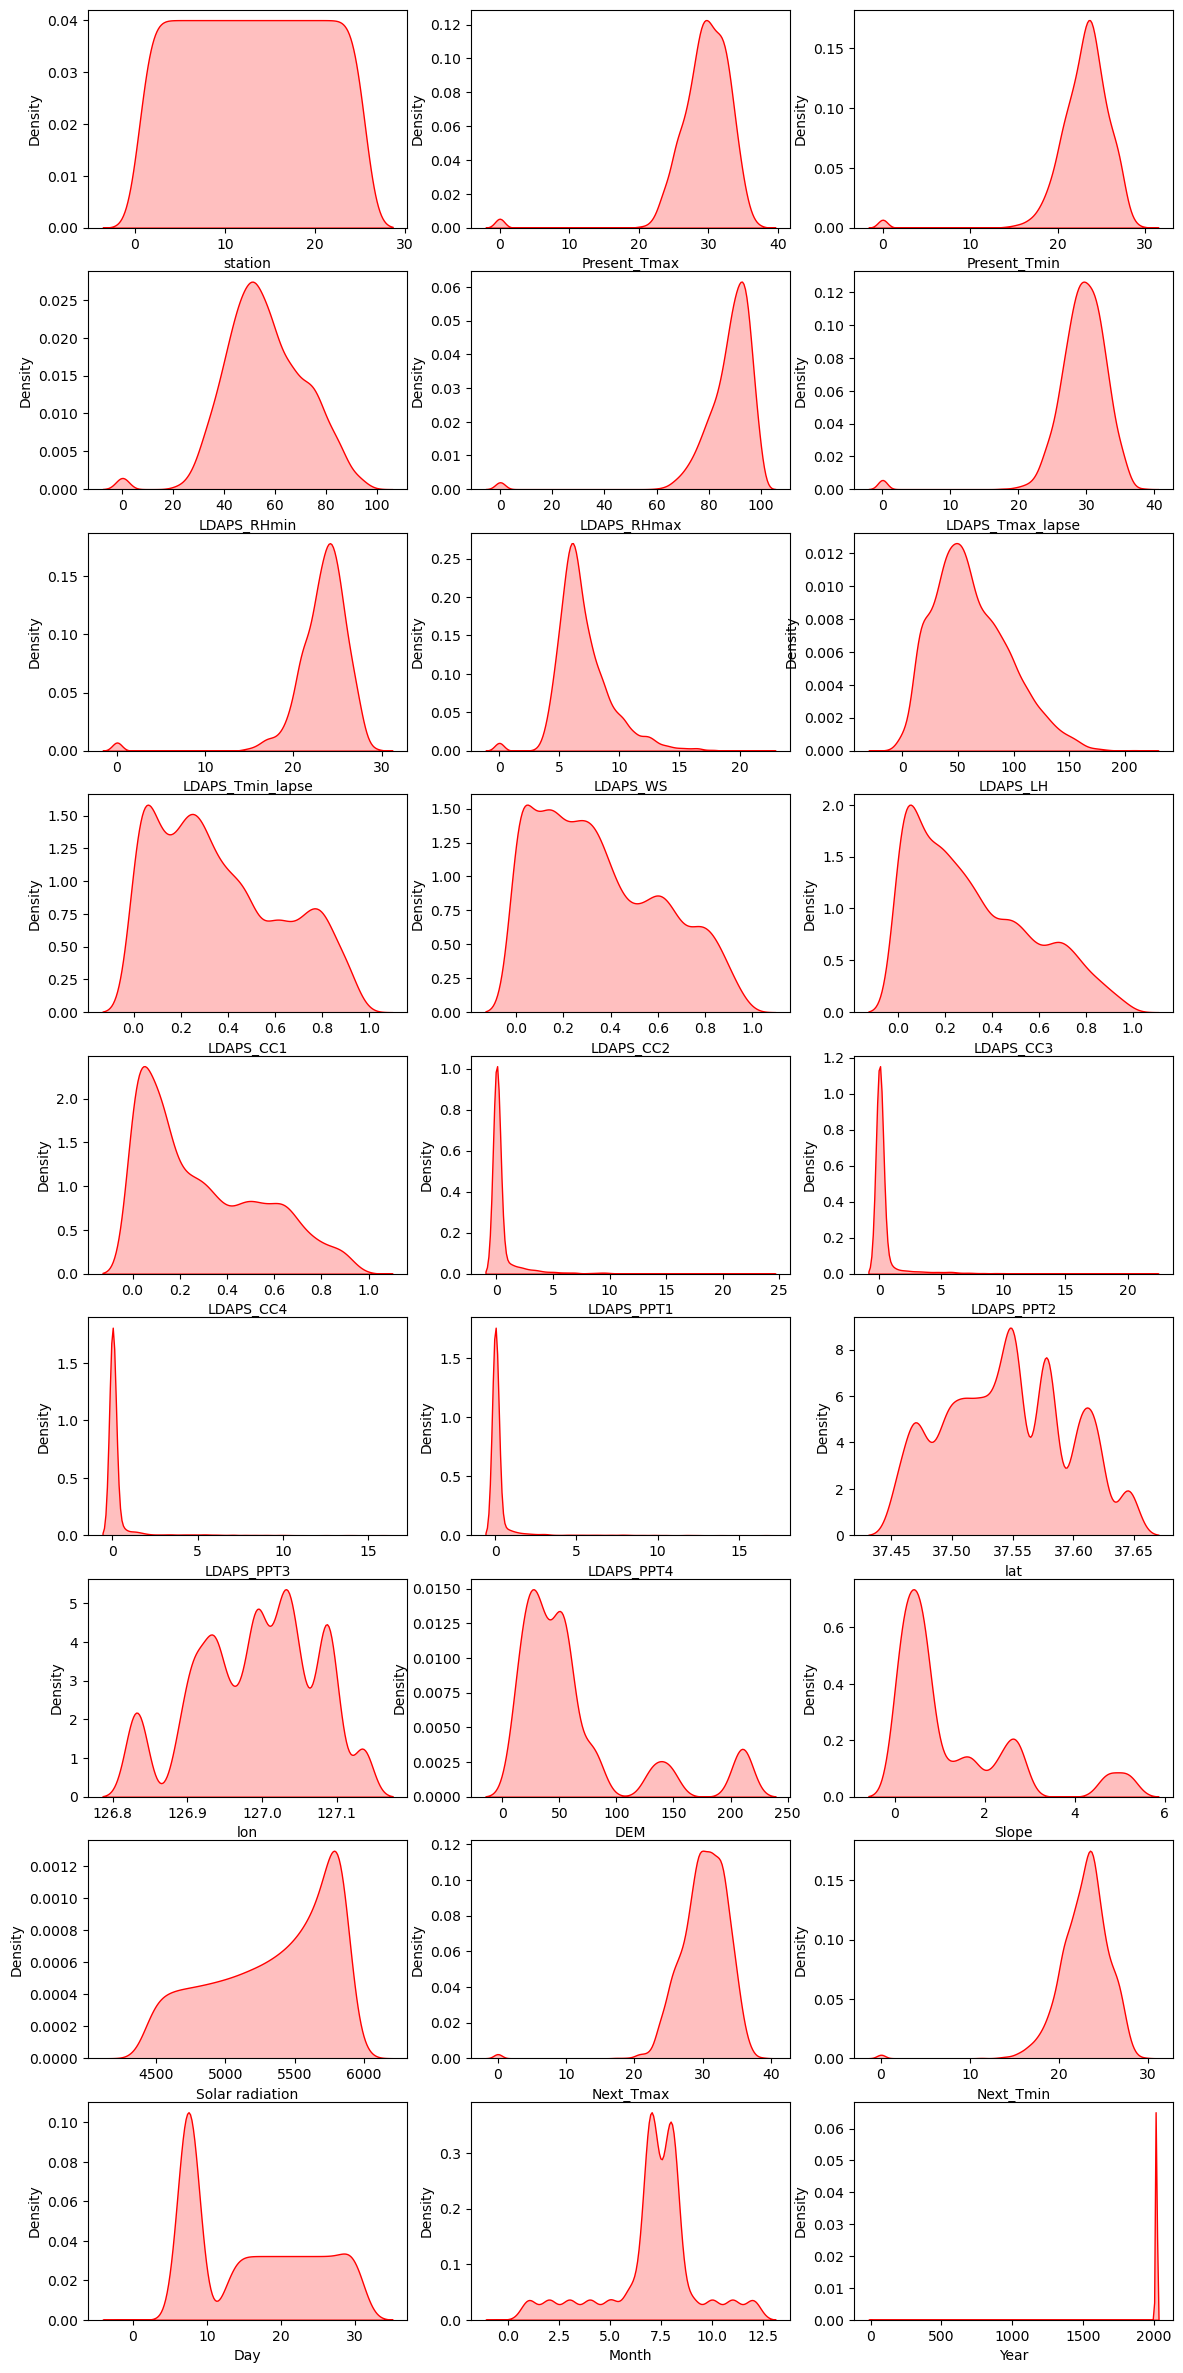

In [60]:
plt.figure(figsize=(14,30))
plotnumber=1
for column in df:
    if plotnumber <=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [61]:
df.skew()

station             -0.000115
Present_Tmax        -3.402987
Present_Tmin        -3.232442
LDAPS_RHmin         -0.113889
LDAPS_RHmax         -4.712138
LDAPS_Tmax_lapse    -3.457452
LDAPS_Tmin_lapse    -3.573353
LDAPS_WS             1.163684
LDAPS_LH             0.635208
LDAPS_CC1            0.460727
LDAPS_CC2            0.474379
LDAPS_CC3            0.643064
LDAPS_CC4            0.671739
LDAPS_PPT1           5.395178
LDAPS_PPT2           5.776835
LDAPS_PPT3           6.458608
LDAPS_PPT4           6.826930
lat                  0.087062
lon                 -0.285213
DEM                  1.723257
Slope                1.563020
Solar radiation     -0.511210
Next_Tmax           -2.213759
Next_Tmin           -2.049088
Day                  0.244656
Month               -0.708304
Year               -62.067548
dtype: float64

Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse',&,'LDAPS_Tmin_lapse' are left skewed.
'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' are Right Skewed.

# Removing Skewness

In [64]:
from scipy.stats import boxcox

# Columns with left-skewed data containing zeros
left_skewed_columns = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse']
# Apply Box-Cox transformation
df[left_skewed_columns] = df[left_skewed_columns].apply(lambda x: boxcox(x + 1)[0])
# columns with right-skewed data containing zeros
right_skewed_columns =  ['LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Year']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[right_skewed_columns] = scaler.fit_transform(df[right_skewed_columns].values)

In [65]:
df.skew()

station            -0.000115
Present_Tmax       -0.220267
Present_Tmin       -0.172641
LDAPS_RHmin        -0.113889
LDAPS_RHmax        -0.664853
LDAPS_Tmax_lapse   -0.179577
LDAPS_Tmin_lapse   -0.262349
LDAPS_WS            0.260866
LDAPS_LH            0.026160
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.643064
LDAPS_CC4           0.671739
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -2.213759
Next_Tmin          -2.049088
Day                 0.244656
Month              -0.708304
Year               -5.191106
dtype: float64

# Spliting data into Feature and Target Variable

In [66]:
feature_columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Day', 'Month', 'Year']
label_columns=['Next_Tmax']
labelcolumn=['Next_Tmin']

In [67]:
X = df[feature_columns]
Y = df[labelcolumn]
y = df[label_columns]

# Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Varience Inflation Factor

Checking Multicollinearity

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

In [70]:
vif

,VIF,Features
0,1.228232,station
1,2.948640,Present_Tmax
2,2.740616,Present_Tmin
3,6.363001,LDAPS_RHmin
4,2.845183,LDAPS_RHmax
5,5.498418,LDAPS_Tmax_lapse
6,6.644986,LDAPS_Tmin_lapse
7,1.360429,LDAPS_WS
8,1.557673,LDAPS_LH
9,5.086571,LDAPS_CC1


1 < VIF < 5: Moderate multicollinearity. The variance of the coefficient is moderately inflated.
VIF > 5: High multicollinearity.

# Machine Learning Model Next_Tmin

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [73]:
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)

In [74]:
X['LDAPS_LH'] = X['LDAPS_LH'].fillna(0)

# DecisionTreeRegressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [81]:
dtr.fit(X_train, Y_train)

pred = dtr.predict(X_test)

# Evaluate the model using regression metrics
r2 = r2_score(Y_test, pred)

print("R-squared:", r2*100)

R-squared: 36.439001307410926


# RandomForestRegressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

pred2 = rfr.predict(X_test)

# Evaluate the model using regression metrics
R3 = r2_score(Y_test, pred2)

print("R-squared:", R3*100)

R-squared: 68.38136663957974


# LinearRegression

In [85]:
from sklearn.linear_model import LinearRegression
rf=LinearRegression()
rf.fit(X_train, Y_train)
pred3= rf.predict(X_test)
R4=r2_score(Y_test,pred3)
print("R-sqaured:", R4*100)

R-sqaured: 64.7635508832748


# XGBRegressor

In [86]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [89]:
xgb.fit(X_train, Y_train)
pred4 = xgb.predict(X_test)

R5= r2_score(Y_test, pred4)

print("R-squared:", R5*100)


R-squared: 64.32014585858268


# ExtraTreesRegressor

In [90]:
from sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor()

In [91]:
etr.fit(X_train, Y_train)
pred5 = etr.predict(X_test)

R6 = r2_score(Y_test, pred5)

print("R-sqaured:", R6*100)

R-sqaured: 68.83106277593302


In [92]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()

In [94]:
br.fit(X_train, Y_train)

pred6 = br.predict(X_test)

R7= r2_score(Y_test, pred6)
print("R-sqaured:", R7*100)

R-sqaured: 65.86753079833501


# Cross Validation

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [98]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

In [99]:
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,Y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7028985382631127
Mean squared error : 2.342971424763543
Root Mean Squared Error: 1.5306767865109678


 R2 Score :
0.692317022253806


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6564191745485812
Mean squared error : 2.350502590283749
Root Mean Squared Error: 1.5331348897875063


 R2 Score :
0.6913280168358718


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0106620808254514
Mean squared error : 5.584316423043852
Root Mean Squared Error: 2.363115829375245


 R2 Score :
0.26665810450824823


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.6532521766245494
Mean squared error : 6.073828366172946
Root Mean Squared Error: 2.464513819432333


 R2 Score :
0.20237456664159015


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.7663412784634462
Mean squared error : 2.423974376932258
Root Mean Squared Error: 1.5569118076924775


 R2 Score :
0.6816795773127018


 Error of  XGBRegress

# Hyper Parameter Tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
parameter = {'n_estimators':[200,400],'gamma':np.arange(0,0.1),
              'booster' : ['gbtree','gblinear'], 'max_depth':[4,6],
              'eta' : [ 0.01, 0.1] }

In [102]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =5)

In [103]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.656 total time=   0.3s
[CV 2/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.598 total time=   0.3s
[CV 3/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.588 total time=   0.3s
[CV 4/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.563 total time=   0.3s
[CV 5/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.670 total time=   0.3s
[CV 1/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.682 total time=   0.6s
[CV 2/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.616 total time=   0.6s
[CV 3/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.625 total time=   0.6s
[CV 4/5] END booster=gbtree, eta=0.

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear'], 'eta': [0.01, 0.1],
                         'gamma': array([0.]), 'max_depth': [4, 6],
                         'n_estimators': [200, 400]},
             verbose=5)

In [104]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 4,
 'n_estimators': 400}

In [105]:
Final_mod =  XGBRegressor(n_estimators=400 , booster= 'gbtree', eta= 0.1, max_depth= 6, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
Y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,Y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.59764675216642
Mean squared error : 2.4098966012389265
Root Mean Squared Error: 1.552384166770238


 R2 Score of Final Model :
0.6835282946720287




# Saving Model of NEXT Temperature Minimum


In [106]:
import  joblib

In [108]:
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

# Prediction Based On Model

In [109]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test).flatten()
predicted = np.array(Model.predict(X_test)).flatten()
df_Predicted = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_Predicted

,Actual Values,Predicted Values
0,25.3,25.427891
1,20.4,20.014509
2,25.1,25.531954
3,25.3,25.642080
4,16.8,16.704922
...,...,...
2321,20.9,20.770493
2322,22.6,22.422853
2323,24.6,22.840010
2324,21.2,21.355484


# Machine Learning Model Next_Tmax

In [110]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.3)

In [111]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,etr,dtc,BR,adb,gbr,xgb]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    max_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
    print('Mean squared error :', mean_squared_error(y_test,max_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,max_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.9030154772141009
Mean squared error : 4.532835699914014
Root Mean Squared Error: 2.1290457251815926


 R2 Score :
0.6353775180780649


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.7795696474634561
Mean squared error : 3.9603443718830618
Root Mean Squared Error: 1.9900613990234226


 R2 Score :
0.6814288693126553


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.3315993121238179
Mean squared error : 11.133701633705932
Root Mean Squared Error: 3.3367201911017252


 R2 Score :
0.10440214659949631


 Error of  BaggingRegressor() :
Mean absolute error : 0.959153052450559
Mean squared error : 4.682115692175408
Root Mean Squared Error: 2.1638196995534096


 R2 Score :
0.6233693966981814


 Error of  AdaBoostRegressor() :
Mean absolute error : 3.1920339621182543
Mean squared error : 19.384775079481933
Root Mean Squared Error: 4.4028144498129755


 R2 Score :
-0.5593163460818265


 Error of  GradientBoosti

# Hyper Parameter Tuning: GridSearchCV

In [112]:
from sklearn.model_selection import GridSearchCV
parameter={'n_estimators': [50, 100],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    }
gsc = GridSearchCV(ExtraTreesRegressor(),parameter,verbose =5)

In [113]:
gsc.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.640 total time=   0.6s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.673 total time=   0.6s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.642 total time=   0.6s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.639 total time=   0.6s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.738 total time=   0.6s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.633 total time=   1.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.670 total time=   1.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.643 total time=   1.3s


GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             verbose=5)

In [114]:
gsc.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [115]:
Final_mod =  ExtraTreesRegressor(max_depth= 20,min_samples_leaf= 2,min_samples_split= 3,n_estimators= 50)

Final_mod.fit(X_train,y_train)
max_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
print('Mean squared error :', mean_squared_error(y_test,max_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,max_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.7740081346734009
Mean squared error : 3.7728909714605092
Root Mean Squared Error: 1.9423931042558067


 R2 Score of Final Model :
0.6965076695674437




# Final Model Saving Of Next_Tmax


In [124]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

In [125]:
# Loading the saved model
Model = joblib.load('Next_Tmax_Forecast_Final.pkl')

# prediction  DataFrame
actual = np.array(y_test).flatten()
predicted1 = np.array(Model.predict(X_test))
df_Predicted1 = pd.DataFrame({"Actual Values":actual,"Predicted Values ":predicted1},index= range(len(actual)))
df_Predicted1 

,Actual Values,Predicted Values
0,32.2,31.526267
1,24.2,24.744333
2,34.2,31.835856
3,29.3,30.831000
4,21.0,21.025333
...,...,...
2321,27.1,27.460333
2322,31.2,31.048833
2323,29.2,26.522000
2324,27.6,27.911333


# Final Predictions:
Next_Tmin Predictions:
The saved Next_Tmin model was loaded, and predictions were made on the test data. The results were stored in a DataFrame comparing actual values with predicted values.
Next_Tmax Predictions:
The saved Next_Tmax model was also loaded, and predictions were made on the test data, with results stored in a similar DataFrame.
Conclusion:
The project successfully built and saved models for forecasting the next day's minimum and maximum temperatures using historical weather data. The models were tuned for optimal performance and evaluated using standard regression metrics. The project concludes with the deployment of these models for future predictions.






